In [16]:
import branch_and_bound as bnb
import twice_around_the_tree as tat
import christofides as cr
import instance_generator as ig
import utils
import time
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

/tmp/ipykernel_10598/886800750.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftat.groupby(["size", "dist"]).mean()["time"].unstack().plot()


Text(0, 0.5, 'time (s)')

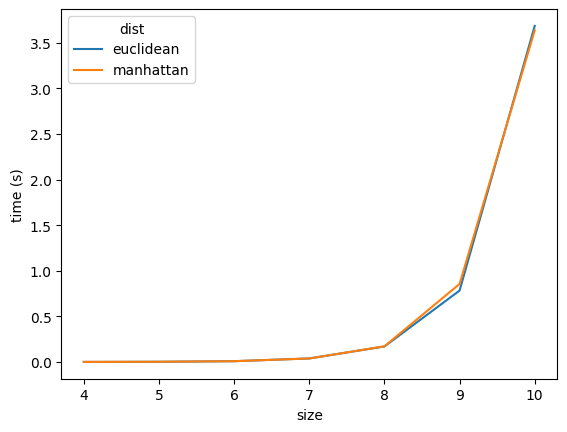

In [6]:
dftat = pd.read_csv("data/twice_around_the_tree.csv")
dftat.groupby(["size", "dist"]).mean()["time"].unstack().plot()
plt.ylabel("time (s)")

/tmp/ipykernel_10598/579949823.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dftat.groupby(["size", "dist"]).mean()["cost"].unstack().plot()


Text(0, 0.5, 'cost')

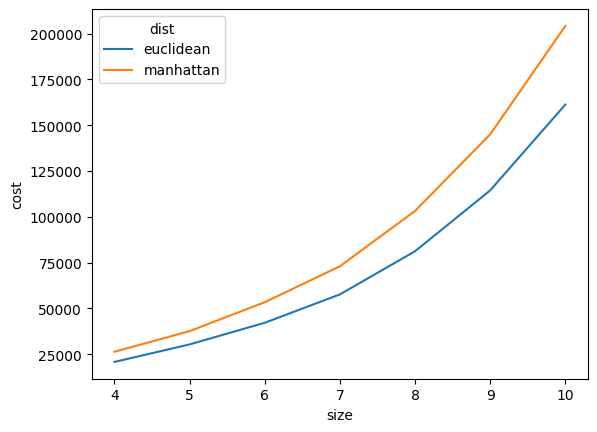

In [7]:
dftat.groupby(["size", "dist"]).mean()["cost"].unstack().plot()
plt.ylabel("cost")

/tmp/ipykernel_10598/2379326120.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfcr.groupby(["size", "dist"]).mean()["time"].unstack().plot()


Text(0, 0.5, 'time (s)')

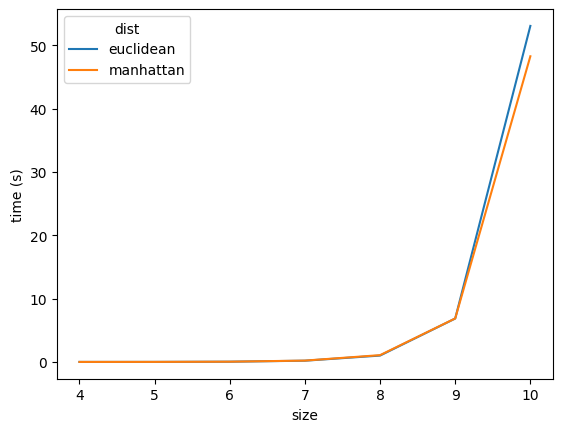

In [8]:
dfcr = pd.read_csv("data/christofides.csv")
dfcr.groupby(["size", "dist"]).mean()["time"].unstack().plot()
plt.ylabel("time (s)")

/tmp/ipykernel_10598/769494286.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfcr.groupby(["size", "dist"]).mean()["cost"].unstack().plot()


Text(0, 0.5, 'cost')

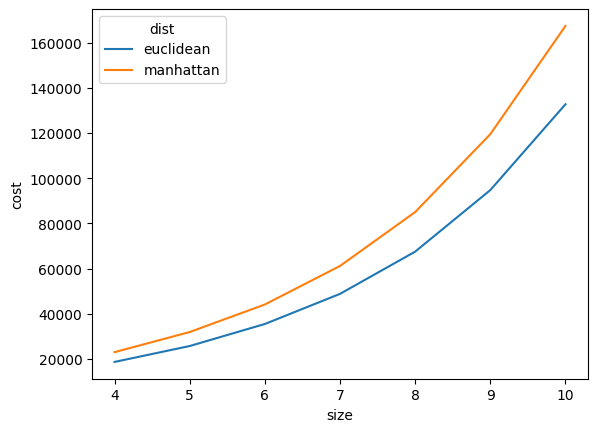

In [9]:
dfcr.groupby(["size", "dist"]).mean()["cost"].unstack().plot()
plt.ylabel("cost")

In [14]:
import pandas as pd
algs = pd.read_csv("data/algs.csv")
#algs.groupby(["size", "alg"]).mean()["cost"].unstack().plot()
algs = algs.groupby(["size", "alg", "dist"]).mean()[["cost", "time"]]
algs

cost       time
size alg                   dist                               
4    christofides          euclidean   18694.113582   0.001846
                           manhattan   23021.200000   0.001736
     twice-around-the-tree euclidean   20830.073570   0.000680
                           manhattan   26367.400000   0.000616
5    christofides          euclidean   25733.876312   0.006618
                           manhattan   31930.360000   0.006450
     twice-around-the-tree euclidean   30384.788790   0.002286
                           manhattan   37640.040000   0.002242
6    christofides          euclidean   35491.685652   0.036902
                           manhattan   44118.400000   0.039486
     twice-around-the-tree euclidean   42185.425844   0.008610
                           manhattan   53423.280000   0.008620
7    christofides          euclidean   48825.996556   0.194672
                           manhattan   61183.960000   0.210878
     twice-around-the-tree euclidean   57672.807460   0.038626
                           manhattan   73016.800000   0.038480
8    christofides          euclidean   67525.065164   1.005492
                           manhattan   85043.160000   1.072720
     twice-around-the-tree euclidean   81229.203436   0.169828
                           manhattan  103205.000000   0.171364
9    christofides          euclidean   94777.210758   6.857486
                           manhattan  119532.560000   6.872704
     twice-around-the-tree euclidean  114446.829232   0.782692
                           manhattan  145009.080000   0.855336
10   christofides          euclidean  132766.232204  53.089028
                           manhattan  167444.800000  48.293676
     twice-around-the-tree euclidean  161266.908856   3.683414
                           manhattan  204166.160000   3.636510

In [17]:
algs = pd.read_csv("data/algs.csv")
df: pd.DataFrame = pd.DataFrame(columns = ["size", "dist", "alg", "time", "path", "cost"])
ge, gm = ig.generate_tsp_instance(4, 5000)
s = time.time()
path = bnb.branch_and_bound_tsp(ge)
e = time.time()
cost = utils.get_path_cost(path, ge)
df = pd.concat([df, pd.Series({"size": 4, "dist": "euclidean", "alg" : "branch_and_bound", "time": round(e-s, 4), "cost": round(cost, 4)}).to_frame().T], ignore_index  = True)


[ 0 12  8  9  7  1 10  4 13  6  2 11  3 14 15  5  0]
